In [2]:
from PIL import Image, ImageFilter, ImageOps, ImageEnhance
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2, os

def convert_stylish_image(img):

    image = img.convert("RGB")
    pixels = image.load()
    width, height = image.size
    for x in range(width):
        for y in range(height):
            r, g, b = pixels[x, y]
            if r < 48 and g < 48 and b < 48:
                if abs(r - g) < 8 and abs(g - b) < 8:
                    pixels[x, y] = (254, 254, 254)

    return image


def loadImageToArray(path, isgray = False):
    _img = Image.open(path)
    # _img = convert_stylish_image(_img)
    # _img = _img.filter(ImageFilter.GaussianBlur(4))
    # .filter(ImageFilter.GaussianBlur(8))
    # _img = _img.filter(ImageFilter.FIND_EDGES).convert("L").filter(ImageFilter.GaussianBlur(8))
    _img = _img.filter(ImageFilter.FIND_EDGES)
    # contrast = ImageEnhance.Contrast(_img)
    # _img = contrast.enhance(2)
    # sharpness = sharpness = ImageEnhance.Sharpness(_img)
    # _img = sharpness.enhance(12)
    _img = _img.convert("L")
    _img = _img.filter(ImageFilter.GaussianBlur(8))
    # _img_ary = np.array(_img)
    return _img

def detect_color_regions(image):
    # 轉換圖片到HSV色彩空間
    # hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # 定義有顏色的區域的顏色範圍（在此範例中假設顏色為紅色）
    lower_red = np.array(32)
    upper_red = np.array(255)

    # 通過應用顏色範圍遮罩獲取有顏色的區域
    mask = cv2.inRange(image, lower_red, upper_red)

    # 尋找輪廓
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 將有顏色的區域用矩形框框出
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image


# image_path = "./img-route/1-2.png"
image_path = "./img-route/1-4.png"
image = loadImageToArray(image_path, True)
image_ary = np.array(image)


# print(image_ary.shape)
# image

In [ ]:
# dark_img = loadImageToArray('./img-route/dark.png', True)
# img_2 = loadImageToArray('./img-route/blue1-4.png', True)
img_2 = loadImageToArray('./img-route/2-2.png', True)
print(np.array(img_2).shape)
img_2

In [ ]:
img_3 = loadImageToArray('./img-route/gg.png', True)
print(np.array(img_3).shape)
img_3

bounding_boxes:  [(287, 239, 113, 50), (0, 0, 400, 238)]
bounding_boxes_2:  [(281, 266, 119, 52), (0, 46, 400, 215), (0, 0, 135, 40)]


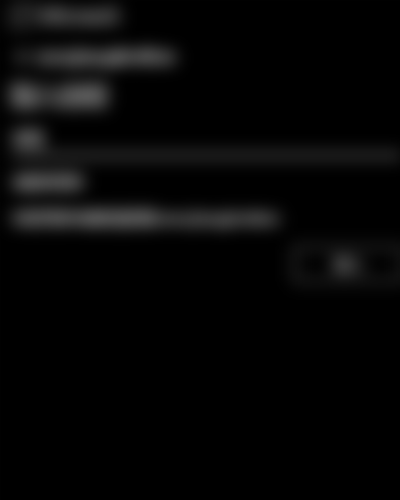

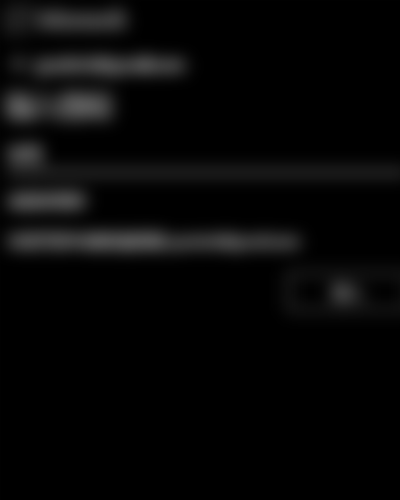

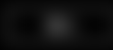

0.644

In [14]:

def calculate_similarity(img1, img2, showshape = False):
    ary1 = np.array(img1)
    ary2 = np.array(img2)
    if ary1.shape != ary2.shape:
        ary2 = np.resize(ary2, ary1.shape)

    ary1 = ary1[20:520, 20:420]
    ary2 = ary2[20:520, 20:420]

    bounding_boxes = get_bounding_boxes(ary1)
    bounding_boxes_2 = get_bounding_boxes(ary2)
    # print('bounding_boxes: ', bounding_boxes)
    # print('bounding_boxes_2: ', bounding_boxes_2)

    similarity = 0
    _i = len(bounding_boxes)
    is_same_contours = _i == len(bounding_boxes_2)

    
    
    if is_same_contours and _i > 1:
        similarity = 1
        while (_i > 0):
            _i -= 1
            _imageary = get_image_by_rect(ary1, bounding_boxes[_i])
            # IPython.display.display(Image.fromarray(_imageary))
            _imageary_2 = get_image_by_rect(ary2, bounding_boxes_2[_i])
            # print('_imageary: ', _imageary.shape, _imageary_2.shape)
            # print('_imageary mean: ', np.mean(_imageary), np.mean(_imageary_2))
            similarity -= (np.mean(_imageary) - np.mean(_imageary_2)) ** 2 / 32
    else:
        con_1 = ary1 < 4
        con_2 = ary2 < 4
        combined_con = np.logical_not(con_1, con_2)
        # print(combined_con, combined_con.shape)
        left_ary_1 = ary1[combined_con]
        left_ary_2 = ary2[combined_con]
        sqt = (left_ary_1 - left_ary_2) ** 2
        mse = np.mean(sqt)
        similarity = 1 - (mse / 255)

    # return similarity
    if showshape:
        print('bounding_boxes: ', bounding_boxes)
        print('bounding_boxes_2: ', bounding_boxes_2)
        IPython.display.display(Image.fromarray(ary1))
        IPython.display.display(Image.fromarray(ary2))

        _imageary = get_image_by_rect(ary1, bounding_boxes[0])
        IPython.display.display(Image.fromarray(_imageary))
    
    return float("{:.3f}".format(max(similarity,0)))

def get_bounding_boxes(imgarray, basic_color=4):
    _, thresholded = cv2.threshold(imgarray, basic_color, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_boxes = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, w, h))
        # IPython.display.display(Image.fromarray(imgarray[y:y+h, x:x+w]))

    return bounding_boxes

def get_image_by_rect(img, rect):
    x,y,w,h = rect
    return img[y:y+h, x:x+w]

# imgs = ['./img-route/2-2.png', './img-route/font2-2.png']
# imgs = ['./img-route/dark1-2.png', './img-route/1-2.png']
imgs = ['./img-route/3-3.png', './img-route/font3-3.png']
calculate_similarity(loadImageToArray(imgs[0]), loadImageToArray(imgs[1]), True)

In [137]:

file_path_images = os.listdir('./img-route/')

data_for_df = {
    '-': file_path_images
}
for idx, fpath in enumerate(file_path_images):
    _row = []
    _img1 = loadImageToArray('./img-route/{}'.format(fpath), True)
    for sub_idx, sub_fp in enumerate(file_path_images):
        if idx == sub_idx:
            similarity = '-'
        else:
            _img2 = loadImageToArray('./img-route/{}'.format(sub_fp), True)
            similarity = calculate_similarity(_img1, _img2)
        _row.append(similarity)
    data_for_df[fpath] = _row
    

df_dataset = pd.DataFrame(data=data_for_df)
df_dataset

,-,0.png,1-1.png,1-2.png,1-3.png,1-4.png,2-1.png,2-2.png,3-1.png,3-2.png,3-3.png,4-1.png,blue1-4.png,dark1-2.png,gg.png,loading.png
0,0.png,-,0.689,0.703,0.0,0.691,0.617,0.0,0.0,0.0,0.6,0.0,0.657,0.704,0.0,0.627
1,1-1.png,0.695,-,0.0,0.679,0.0,0.624,0.605,0.605,0.623,0.0,0.591,0.683,0.732,0.617,0.627
2,1-2.png,0.691,0.0,-,0.665,0.0,0.613,0.615,0.599,0.618,0.0,0.59,0.66,0.765,0.626,0.627
3,1-3.png,0.0,0.646,0.645,-,0.711,0.627,0.0,0.0,0.0,0.623,0.0,0.691,0.696,0.0,0.712
4,1-4.png,0.676,0.0,0.0,0.716,-,0.629,0.627,0.628,0.636,0.0,0.616,0.771,0.672,0.619,0.712
5,2-1.png,0.624,0.647,0.634,0.661,0.661,-,0.631,0.678,0.685,0.608,0.691,0.661,0.693,0.619,1.0
6,2-2.png,0.0,0.613,0.636,0.0,0.659,0.639,-,0.0,0.0,0.657,0.0,0.679,0.665,0.978,0.626
7,3-1.png,0.0,0.613,0.616,0.0,0.637,0.666,0.0,-,0.072,0.613,0.0,0.674,0.675,0.071,1.0
8,3-2.png,0.0,0.629,0.632,0.0,0.669,0.684,0.0,0.072,-,0.614,0.0,0.664,0.657,0.0,1.0
9,3-3.png,0.639,0.0,0.0,0.651,0.0,0.631,0.651,0.619,0.623,-,0.61,0.647,0.656,0.696,0.627


In [138]:
BASIC_RATE = 0.765

for index, row in df_dataset.iterrows():
    # Modify specific values based on conditions or positions
    _i = 0
    for col in row:
        if isinstance(col, float):
            if col > BASIC_RATE:
                df_dataset.at[index, df_dataset.columns[_i]] = 'OK'
        _i+=1
df_dataset

,-,0.png,1-1.png,1-2.png,1-3.png,1-4.png,2-1.png,2-2.png,3-1.png,3-2.png,3-3.png,4-1.png,blue1-4.png,dark1-2.png,gg.png,loading.png
0,0.png,-,0.689,0.703,0.0,0.691,0.617,0.0,0.0,0.0,0.6,0.0,0.657,0.704,0.0,0.627
1,1-1.png,0.695,-,0.0,0.679,0.0,0.624,0.605,0.605,0.623,0.0,0.591,0.683,0.732,0.617,0.627
2,1-2.png,0.691,0.0,-,0.665,0.0,0.613,0.615,0.599,0.618,0.0,0.59,0.66,0.765,0.626,0.627
3,1-3.png,0.0,0.646,0.645,-,0.711,0.627,0.0,0.0,0.0,0.623,0.0,0.691,0.696,0.0,0.712
4,1-4.png,0.676,0.0,0.0,0.716,-,0.629,0.627,0.628,0.636,0.0,0.616,OK,0.672,0.619,0.712
5,2-1.png,0.624,0.647,0.634,0.661,0.661,-,0.631,0.678,0.685,0.608,0.691,0.661,0.693,0.619,OK
6,2-2.png,0.0,0.613,0.636,0.0,0.659,0.639,-,0.0,0.0,0.657,0.0,0.679,0.665,OK,0.626
7,3-1.png,0.0,0.613,0.616,0.0,0.637,0.666,0.0,-,0.072,0.613,0.0,0.674,0.675,0.071,OK
8,3-2.png,0.0,0.629,0.632,0.0,0.669,0.684,0.0,0.072,-,0.614,0.0,0.664,0.657,0.0,OK
9,3-3.png,0.639,0.0,0.0,0.651,0.0,0.631,0.651,0.619,0.623,-,0.61,0.647,0.656,0.696,0.627


imageary shape:  (500, 400)


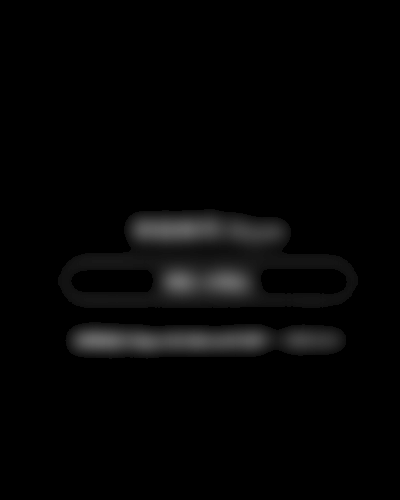

In [142]:
imageary = calculate_similarity(loadImageToArray('./img-route/blue1-4.png', True), loadImageToArray('./img-route/1-4.png', True), True)
print('imageary shape: ', imageary.shape)
# print('imageary shape: ', imageary)
Image.fromarray(imageary)

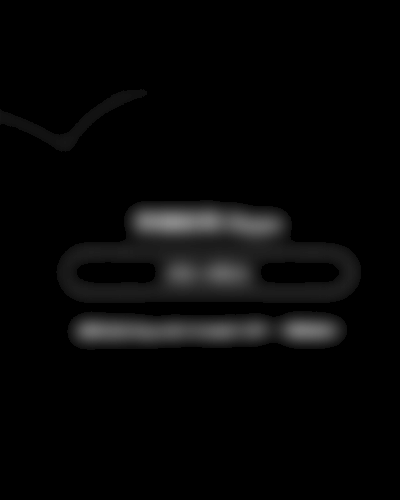

In [143]:
imageary = calculate_similarity(loadImageToArray('./img-route/1-4.png', True), loadImageToArray('./img-route/blue1-4.png', True), True)
Image.fromarray(imageary)

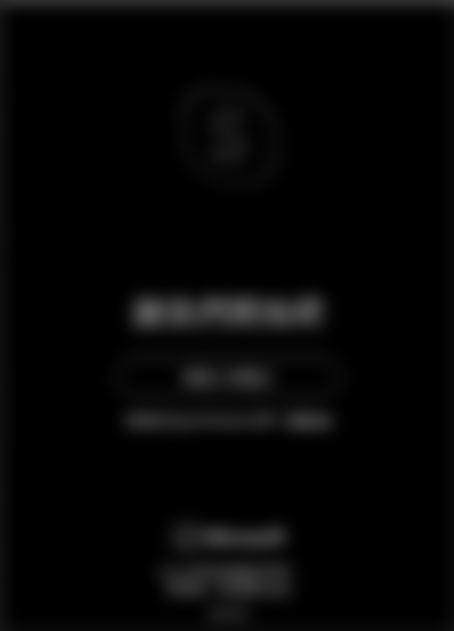

In [145]:
loadImageToArray('./img-route/dark1-2.png', True)

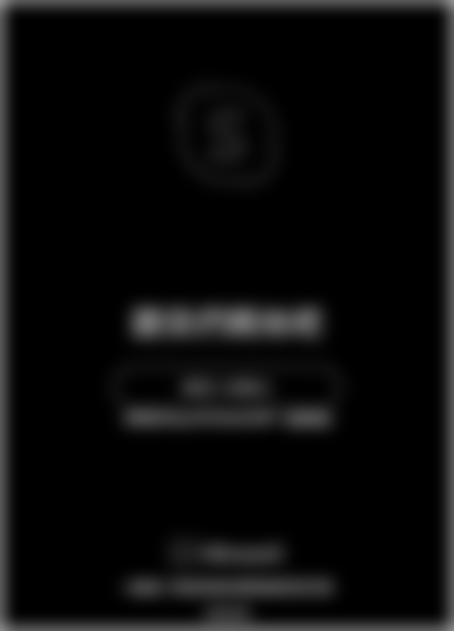

In [146]:
loadImageToArray('./img-route/1-2.png', True)

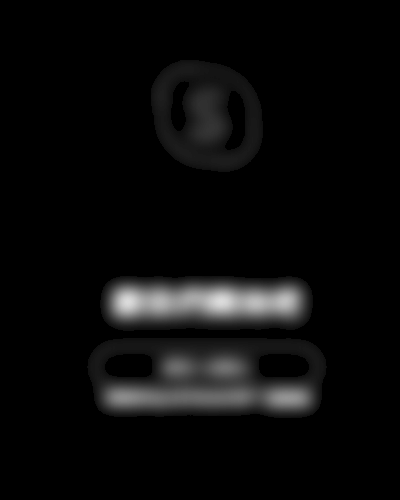

In [147]:
imageary = calculate_similarity(loadImageToArray('./img-route/1-2.png', True), loadImageToArray('./img-route/dark1-2.png', True), True)
Image.fromarray(imageary)

In [ ]:
loadImageToArray('./img-route/blue.png', True)